### Acknowledgement: This code has been mainly adopted from the Random Quantum Neural Network paper. https://github.com/darthsimpus/RQNN

In [ ]:
pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 14.4 MB/s 
     |████████████████████████████████| 15.3 MB 36.7 MB/s 
     |████████████████████████████████| 145 kB 66.8 MB/s 
     |████████████████████████████████| 1.9 MB 56.6 MB/s 


In [ ]:
pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=946985ade8ea8118ca7ce28b95e1b4f751a80833e496e5bd7c9479e1d55024eb
  Stored in directory: /root/.cache/pip/wheels/27/40/a8/6447ee4a00cb87e2084e1ef1df5c38433720cc1090be082842
Successfully built idx2numpy


In [ ]:
pip install pytorch_spiking

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
device = "cpu"
# device = "cuda"
import time,os,copy
import idx2numpy 
import numpy as np 
from tqdm import tqdm

import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, transforms

seed = 42
np.random.seed(seed)

# Plotting
import matplotlib.pyplot as plt

# OpenMP: number of parallel threads.
os.environ["OMP_NUM_THREADS"] = "16"

create = True

class_names = [
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)
dataset = "Fashion_last4"

array([3, 1, 3, ..., 0, 1, 2])

16800 7200
16800 7200
7200 7200 16800 16800


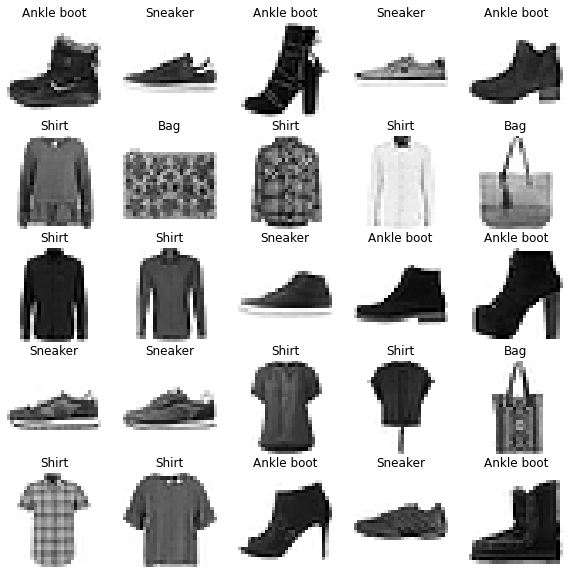

In [ ]:
arr3 = []
arr4 = []
file1 = '/content/sample_data/train-images-idx3-ubyte' 
arr = idx2numpy.convert_from_file(file1)
file2 = '/content/sample_data/train-labels-idx1-ubyte' 
arr2 = idx2numpy.convert_from_file(file2)
for i in range(len(arr)):
    if arr2[i] in [6,7,8,9]:
        arr3.append(arr[i])
        arr4.append(arr2[i])

n_steps = 10
train_images = np.asarray(arr3,dtype=np.float32) / 255.0
train_labels = np.asarray(arr4,dtype=np.int64)
train_labels -= 6
display(train_labels)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

# splitting the full dataset of 5 classes into test and train images to ensure the testing does not happen on images from train data.
split = np.array_split(train_images,[int(len(train_images)*0.7)])
train_sequences = split[0]
test_sequences = split[1]
print(len(split[0]),len(split[1]))
split = np.array_split(train_labels,[int(len(train_labels)*0.7)])
train_labels = split[0]
test_labels = split[1]
print(len(split[0]),len(split[1]))
datalength = 5000
# we restrict the training to first 5000 images of 21000
train_sequences = np.tile(train_sequences[:, None], (1, n_steps, 1, 1))#[:datalength]
test_sequences = np.tile(test_sequences[:, None], (1, n_steps, 1, 1))
# train_labels = train_labels[:datalength]
if create:
    np.savez_compressed("/content/sample_data/last4/test_labels.npz",test_labels)
    np.savez_compressed(f"/content/sample_data/last4/test_seqs_{seed}.npz",test_sequences)
    np.savez_compressed("/content/sample_data/last4/train_labels.npz",train_labels)
    np.savez_compressed(f"/content/sample_data/last4/train_seqs_{seed}.npz",train_sequences)

print(len(test_labels),len(test_sequences),len(train_labels),len(train_sequences))

In [ ]:
#train_sequences = np.tile(train_images[:, None], (1, n_steps, 1, 1))
#test_sequences = np.tile(test_images[:, None], (1, n_steps, 1, 1))

# Salt and Pepper Noise

In [ ]:
def salt_pepper(test_sequences,test_labels,prob,salt=0,pepper=1):
  sampled_images = test_sequences
  sampled_labels = test_labels
  for j in range(len(test_labels)):
    for i in range(np.shape(sampled_images[j])[0]):
      for y in range(28):
        for x in range(28):
          r = np.random.random() 
          if r < prob:
            sampled_images[j][i][y][x] = salt
          elif r > 1-prob:
            sampled_images[j][i][y][x] = pepper
  return sampled_images,sampled_labels

In [ ]:
if create:
    for i in range(1,10,1):
        d , l =salt_pepper(np.load(f"/content/sample_data/last4/test_seqs_{seed}.npz")['arr_0'],np.load(f"/content/sample_data/last4/test_labels.npz")['arr_0'],i/100.0)
        np.savez_compressed(f"/content/sample_data/last4//snp_{i/100.0}_{seed}.npz",d)
    for i in range(1,6,1):
        d , l =salt_pepper(np.load(f"/content/sample_data/last4/test_seqs_{seed}.npz")['arr_0'],np.load(f"/content/sample_data/last4/test_labels.npz")['arr_0'],i/10.0)
        np.savez_compressed(f"/content/sample_data/last4//snp_{i/10.0}_{seed}.npz",d)

noise probability = 0.1
1noise probability = 0.18
2noise probability = 0.18
3noise probability = 0.18
4noise probability = 0.18
5noise probability = 0.18
6noise probability = 0.18
7noise probability = 0.18
8noise probability = 0.18
9noise probability = 1.8
1noise probability = 1.8
2noise probability = 1.8
3noise probability = 1.8
4noise probability = 1.8
5

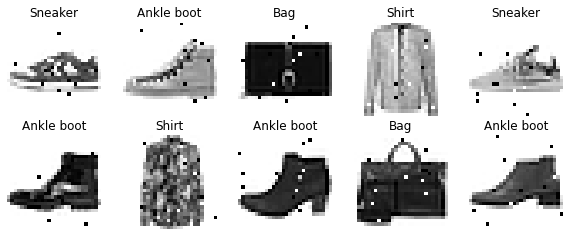

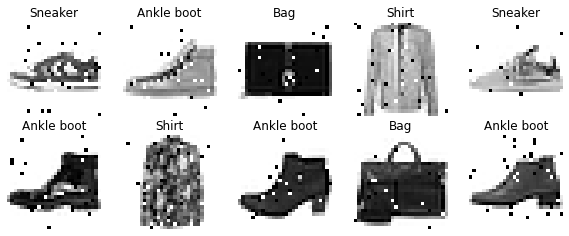

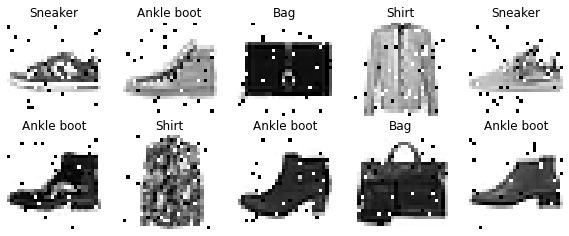

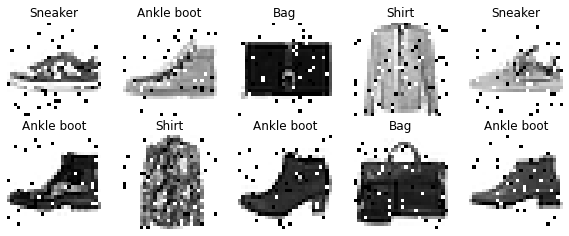

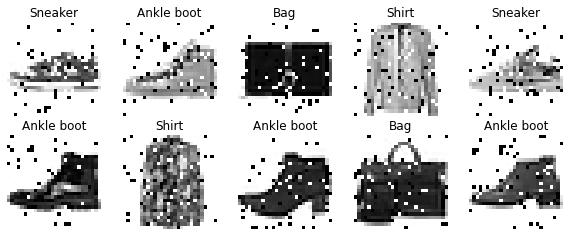

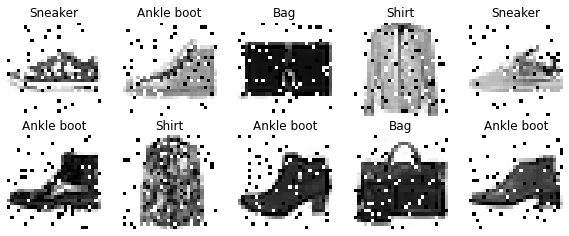

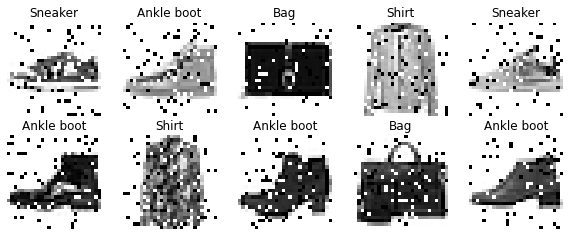

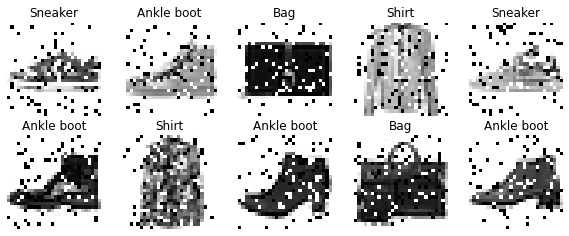

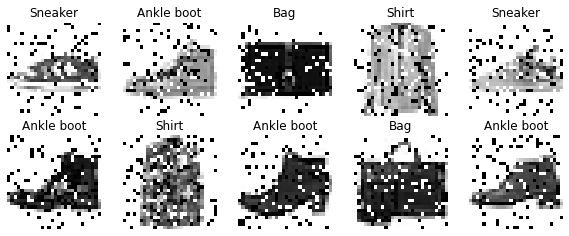

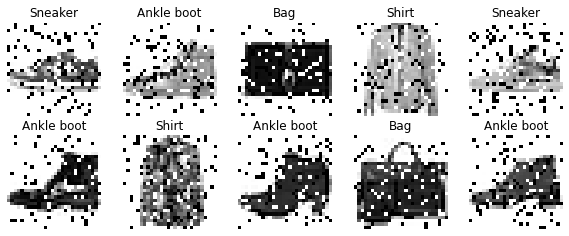

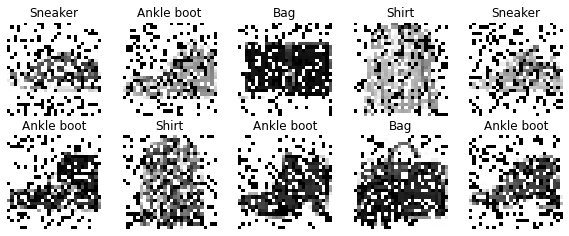

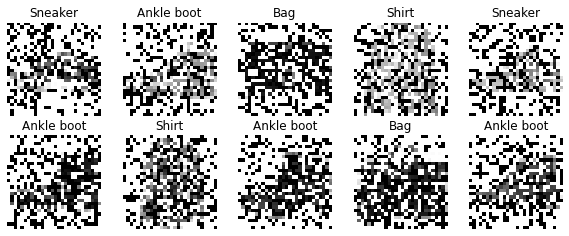

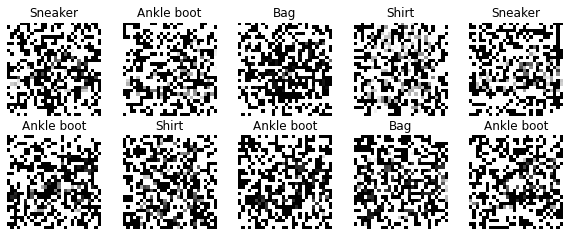

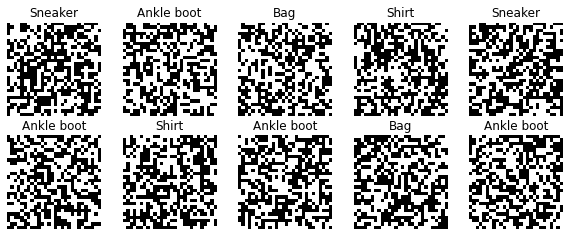

In [ ]:
for ii in range(1,10,1):
    print(f"noise probability = {2*i/100.}")
    d = np.load(f"/content/sample_data/last4/snp_{ii/100.0}_{seed}.npz")['arr_0']
    l = np.load(f"/content/sample_data/last4/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        plt.title(class_names[l[i+2]])
    #plt.show()
    print(ii,end='')
    plt.savefig(f"/content/sample_data/last4/snp_{str(ii/100.0)}.png",dpi=500,transparent=False)
    plt.savefig(f"/content/sample_data/last4/snp_{str(ii/100.0)}.ps")
     
     
for ii in range(1,6,1):
    print(f"noise probability = {2*i/10.}")
    d = np.load(f"/content/sample_data/last4/snp_{ii/10.0}_{seed}.npz")['arr_0']
    l = np.load(f"/content/sample_data/last4/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        plt.title(class_names[l[i+2]])
    #plt.show()
    print(ii,end='')
    plt.savefig(f"/content/sample_data/last4/snp_{str(ii/10.0)}.png",dpi=500,transparent=False)
    plt.savefig(f"/content/sample_data/last4/snp_{str(ii/10.0)}.ps")
     
     

# Pre-train on Fashion MNIST using 4 classes

In [ ]:
device = "cpu"
import time,os,copy,torch,torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, transforms
from tqdm import tqdm
import pickle
# Pennylane
import pennylane as qml
from pennylane import numpy as np
import pennylane_lightning
import idx2numpy 
torch.manual_seed(42)
np.random.seed(42)
seed = 42
# Plotting
import matplotlib.pyplot as plt
import pytorch_spiking
# OpenMP: number of parallel threads.
os.environ["OMP_NUM_THREADS"] = "16"

In [ ]:
spikeaware_model = torch.nn.Sequential(

    torch.nn.Linear(784, 128),

    pytorch_spiking.SpikingActivation(

        torch.nn.ReLU(), dt=0.01, spiking_aware_training=True

    ),

    pytorch_spiking.TemporalAvgPool(),

    torch.nn.Linear(128, 4),

)

In [ ]:
# spikeaware_model = torch.load(spikeaware_model) 
display(spikeaware_model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): SpikingActivation(
    (activation): ReLU()
  )
  (2): TemporalAvgPool()
  (3): Linear(in_features=128, out_features=4, bias=True)
)

In [ ]:
n_qubits = 6            # Number of qubits
q_depth = 2             # The depth of the quantum layer
nqubits=n_qubits
tensor_length = n_qubits*(n_qubits-1)*q_depth+n_qubits
q_delta = 0.01

In [ ]:
def H_layer(nqubits): # Hadamard Gate
    for idx in range(nqubits):
        qml.Hadamard(wires=idx)

def RZ_layer(w): # Rotation Gate
    for idx, element in enumerate(w):
        qml.RZ(element, wires=idx)

def entangling_layer(nqubits,weights):
    p = nqubits
    weights_ = (weight for weight in weights)
    for i in range(1,nqubits):
        for j in range(i):
            qml.CNOT(wires=[j,i])
            param = next(weights_)
            # vqc_params.append(param)
            qml.RZ(param, wires=i)
            p+=1
            param = next(weights_)
            # vqc_params.append(param)
            qml.RX(param, wires=i)
            p+=1
            qml.CNOT(wires=[j,i])

In [ ]:
dev = qml.device('default.qubit', wires=n_qubits)
@qml.qnode(dev, interface="torch")

def quantum_net(q_input_features, q_weights_flat):
    q_weights = q_weights_flat
    H_layer(n_qubits)
    RZ_layer(q_input_features)
    entangling_layer(nqubits,q_weights)
    exp_vals = [qml.expval(qml.PauliZ(position)) for position in range(n_qubits)]
    return tuple(exp_vals)
    
class DressedQuantumNet(nn.Module):

    def __init__(self):

        super().__init__()
        self.pre_net = nn.Linear(128, n_qubits)
        self.q_params = nn.Parameter(q_delta * torch.randn(tensor_length))
        self.post_net = nn.Linear(n_qubits, 4)

    def forward(self, input_features):

        pre_out = self.pre_net(input_features)
        q_in = torch.tanh(pre_out) * np.pi / 2.0
        q_out = torch.Tensor(0, n_qubits)
        q_out = q_out.to(device)
        for elem in q_in:
            q_out_elem = quantum_net(elem, self.q_params).float().unsqueeze(0)
            q_out = torch.cat((q_out, q_out_elem))
            
        return self.post_net(q_out)

In [ ]:
model_hybrid = copy.deepcopy(torch.nn.Sequential(*(list(spikeaware_model.children())[:-1])))
for param in model_hybrid.parameters():
    param.requires_grad = False

model_hybrid.fc = DressedQuantumNet()

model_hybrid = model_hybrid.to(device)
display(model_hybrid)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): SpikingActivation(
    (activation): ReLU()
  )
  (2): TemporalAvgPool()
  (fc): DressedQuantumNet(
    (pre_net): Linear(in_features=128, out_features=6, bias=True)
    (post_net): Linear(in_features=6, out_features=4, bias=True)
  )
)

In [ ]:
class_names = [
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)

arr3 = []
arr4 = []
file1 = './train-images-idx3-ubyte' 
arr = idx2numpy.convert_from_file(file1)
file2 = './train-labels-idx1-ubyte' 
arr2 = idx2numpy.convert_from_file(file2)
for i in range(len(arr)):
    if arr2[i] in [6,7,8,9]:
        arr3.append(arr[i])
        arr4.append(arr2[i])

In [ ]:
n_steps = 10
train_images = np.asarray(arr3,dtype=np.float32) / 255.0
train_labels = np.asarray(arr4,dtype=np.int64)

In [ ]:
train_labels -= 6
display(train_labels)

tensor([3, 1, 3, ..., 0, 1, 2], dtype=int64, requires_grad=True)

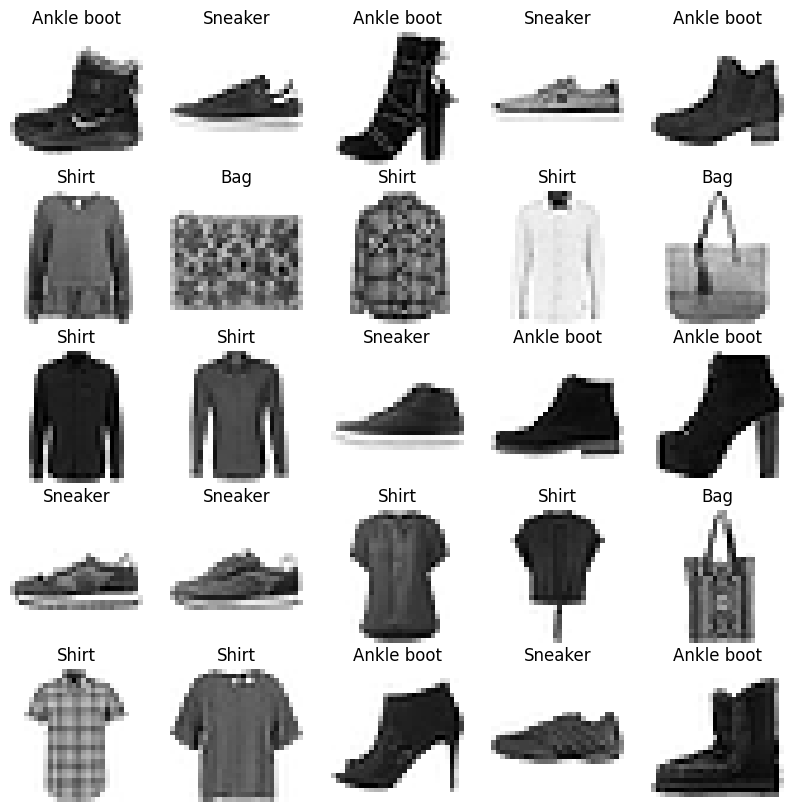

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

In [ ]:
split = np.array_split(train_images,[int(len(train_images)*0.7)])
train_sequences = split[0]
test_sequences = split[1]
print(len(split[0]),len(split[1]))
split = np.array_split(train_labels,[int(len(train_labels)*0.7)])
train_labels = split[0]
test_labels = split[1]
print(len(split[0]),len(split[1]))
datalength = 5000

train_sequences = np.tile(train_sequences[:, None], (1, n_steps, 1, 1))[:datalength]
test_sequences = np.tile(test_sequences[:, None], (1, n_steps, 1, 1))
train_labels = train_labels[:datalength]
test_labels = test_labels

print(len(test_labels),len(test_sequences),len(train_labels),len(train_sequences))

16800 7200
16800 7200
7200 7200 5000 5000


In [ ]:
def train(input_model, train_x, test_x):
    minibatch_size = 32
    optimizer = torch.optim.Adam(input_model.parameters())
    input_model.train()
    for j in range(30):
        train_acc = 0
        loss_acc = 0
        for i in tqdm(range(train_x.shape[0] // minibatch_size)):
            input_model.zero_grad()
 
            batch_in = train_x[i * minibatch_size : (i + 1) * minibatch_size]

            batch_in = batch_in.reshape((-1,) + train_x.shape[1:-2] + (784,))
            batch_label = train_labels[i * minibatch_size : (i + 1) * minibatch_size]
           
            output = input_model(torch.tensor(batch_in))
            
            logp = torch.nn.functional.log_softmax(output, dim=-1)
            logpy = torch.gather(logp, 1, torch.tensor(batch_label).view(-1, 1))
            loss = -logpy.mean()
            loss_acc += loss 
 
            loss.backward()
            optimizer.step()
 
            train_acc += torch.mean(
                torch.eq(torch.argmax(output, dim=1), torch.tensor(batch_label)).float()
            )
        train_acc /= i + 1  
        
        print("Train accuracy (%d): " % j, train_acc.numpy())
        metric_train=train_acc.numpy()

        loss_acc /=i + 1
        print("Loss (%d): " % j, loss_acc.detach().numpy())
        torch.save(model_hybrid,f="./model_saves/4_class/6x2_zz_{0}_{1}_{2}.h5".format(j+21,train_acc.numpy(),loss_acc.detach().numpy()))
        metric_loss= loss_acc.detach().numpy()
        metric = []
        metric.append([metric_train,metric_loss])
        np.save("metrics.npy",np.array(metric))
    
    # compute test accuracy
    input_model.eval()
    test_acc = 0
    for i in range(test_x.shape[0] // minibatch_size):
        batch_in = test_x[i * minibatch_size : (i + 1) * minibatch_size]
        batch_in = batch_in.reshape((-1,) + test_x.shape[1:-2] + (784,))
        batch_label = test_labels[i * minibatch_size : (i + 1) * minibatch_size]
        output = input_model(torch.tensor(batch_in))
         
        test_acc += torch.mean(
            torch.eq(torch.argmax(output, dim=1), torch.tensor(batch_label)).float()
        )
 
    test_acc /= i + 1
 
    print("Test accuracy:", test_acc.numpy())



In [ ]:
def test(input_model, test_x):
    minibatch_size = 32
    optimizer = torch.optim.Adam(input_model.parameters())

    input_model.eval()
    test_acc = 0
    for i in range(test_x.shape[0] // minibatch_size):
        batch_in = test_x[i * minibatch_size : (i + 1) * minibatch_size]
        batch_in = batch_in.reshape((-1,) + test_x.shape[1:-2] + (784,))
        batch_label = test_labels[i * minibatch_size : (i + 1) * minibatch_size]
        output = input_model(torch.tensor(batch_in))

        test_acc += torch.mean(
            torch.eq(torch.argmax(output, dim=1), torch.tensor(batch_label)).float()
        )

    test_acc /= i + 1

    print("Test accuracy:", test_acc.numpy())

In [ ]:
train(model_hybrid, train_sequences, test_sequences)

# Testing with noise

In [ ]:
n_qubits = 6             # Number of qubits
nqubits=n_qubits
q_depth = 2            # Depth of the quantum circuit (number of variational layers)
q_delta = 0.01              # Initial spread of random quantum weights
tensor_length = n_qubits*(n_qubits-1)*q_depth+n_qubits*(q_depth-1)
print(tensor_length)

def H_layer(nqubits):
    for idx in range(nqubits):
        qml.Hadamard(wires=idx)

def RZ_layer(w):
    for idx, element in enumerate(w):
        qml.RZ(element, wires=idx)

def entangling_layer(nqubits,weights):
    p = nqubits
    weights_ = (weight for weight in weights)
    for i in range(1,nqubits):
        for j in range(i):
            qml.CNOT(wires=[j,i])
            param = next(weights_)
            # vqc_params.append(param)
            qml.RZ(param, wires=i)
            p+=1
            param = next(weights_)
            # vqc_params.append(param)
            qml.RX(param, wires=i)
            p+=1
            qml.CNOT(wires=[j,i])

dev = qml.device("default.qubit", wires=n_qubits)
@qml.qnode(dev, interface="torch")
def quantum_net(q_input_features, q_weights_flat):

    q_weights = q_weights_flat
    H_layer(n_qubits)
    RZ_layer(q_input_features)
    entangling_layer(nqubits,q_weights)
    exp_vals = [qml.expval(qml.PauliZ(position)) for position in range(n_qubits)]

    return tuple(exp_vals)
    
class DressedQuantumNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.pre_net = nn.Linear(128, n_qubits)
        self.q_params = nn.Parameter(q_delta * torch.randn(tensor_length))
        self.post_net = nn.Linear(n_qubits, 5)

    def forward(self, input_features):
        pre_out = self.pre_net(input_features)
        q_in = torch.tanh(pre_out) * np.pi / 2.0
        q_out = torch.Tensor(0, n_qubits)
        q_out = q_out.to(device)
        for elem in q_in:
            q_out_elem = quantum_net(elem, self.q_params).float().unsqueeze(0)
            q_out = torch.cat((q_out, q_out_elem))
        return self.post_net(q_out)

66


In [ ]:
class DressedClassicalNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.pre_net = nn.Linear(128, 6)
        self.mid_net = nn.Linear(6,6)
        self.post_net = nn.Linear(6, 5)

    def forward(self, input_features):
        pre_out = self.pre_net(input_features)
        q_in = torch.tanh(pre_out) * np.pi / 2.0
        mid_out = self.mid_net(q_in)
        return self.post_net(mid_out)

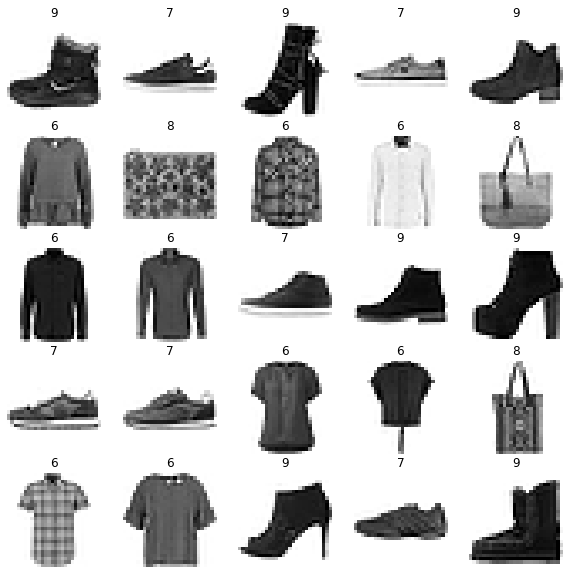

In [ ]:
class_names = [
    "6",
    "7",
    "8",
    "9",
]
num_classes = len(class_names)
train_images = np.load(f"/content/sample_data/last4/train_seqs_{seed}.npz")['arr_0']
train_labels = np.load(f"/content/sample_data/last4/train_labels.npz")['arr_0']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i][0], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

In [ ]:
class Model:
    def __init__(self,path,desc):
        self.path = path
        self.desc = desc
        self.gauss = {'0.01':0.,'0.02':0.,'0.03':0.,'0.04':0.,'0.05':0.,'0.06':0.,'0.07':0.,'0.08':0.,'0.09':0.,'0.1':0.,'0.2':0.,'0.3':0.,'0.4':0.,'0.5':0.,'0.6':0.,'0.7':0.,'0.8':0.,'0.9':0.}
        self.snp = {'0.01':0.,'0.02':0.,'0.03':0.,'0.04':0.,'0.05':0.,'0.06':0.,'0.07':0.,'0.08':0.,'0.09':0.,'0.1':0.,'0.2':0.,'0.3':0.,'0.4':0.,'0.5':0.}
        self.uniform = {'0.01':0.,'0.02':0.,'0.03':0.,'0.04':0.,'0.05':0.,'0.06':0.,'0.07':0.,'0.08':0.,'0.09':0.,'0.1':0.,'0.2':0.,'0.3':0.,'0.4':0.,'0.5':0.,'0.6':0.,'0.7':0.,'0.8':0.,'0.9':0.}
        self.rayleigh ={'0.01':0.,'0.02':0.,'0.03':0.,'0.04':0.,'0.05':0.,'0.06':0.,'0.07':0.,'0.08':0.,'0.09':0.,'0.1':0.,'0.2':0.,'0.3':0.,'0.4':0.,'0.5':0.,'0.6':0.,'0.7':0.,'0.8':0.,'0.9':0.}
        self.perlin = {'1x1':0.,'7x7':0.,'14x14':0.}

    def dump(self):
        np.savez_compressed(file=self.desc,gauss=self.gauss,snp=self.snp,uniform=self.uniform,rayleigh=self.rayleigh,perlin=self.perlin)

In [ ]:
modelnames = {
    "/content/sample_data/model_new/6x2_zz_26_0.39423078298568726_1.2879990339279175.h5":"newRQNN",
    "/content/sample_data/model_RQNN/6x2_zz_31_0.39182692766189575_1.2919402122497559.h5":"RQNN",
    "/content/sample_data/model_DCCN/6x2_zz_119_0.41245993971824646_1.2522696256637573.h5":"DCNN",
    "/content/sample_data/models_RNN/6x2_zz_116_0.9865785241127014_0.03492726385593414.h5":"RNN",
}
# "path_to_file.h5" : "short description of this model"
models = [Model(k,v) for k,v in modelnames.items()]
for model in models:
    print(model.path,model.desc)
    print('-------------------------- '*2)

/content/sample_data/model_new/6x2_zz_26_0.39423078298568726_1.2879990339279175.h5 newRQNN
-------------------------- -------------------------- 
/content/sample_data/model_RQNN/6x2_zz_31_0.39182692766189575_1.2919402122497559.h5 RQNN
-------------------------- -------------------------- 
/content/sample_data/model_DCCN/6x2_zz_119_0.41245993971824646_1.2522696256637573.h5 DCNN
-------------------------- -------------------------- 
/content/sample_data/models_RNN/6x2_zz_116_0.9865785241127014_0.03492726385593414.h5 RNN
-------------------------- -------------------------- 


In [ ]:
test_labels = np.load(f"/content/sample_data/last4/test_labels.npz")['arr_0']

In [ ]:
input_array_ = []

In [ ]:
def test(input_model,test_x,key):
    minibatch_size = 32
    optimizer = torch.optim.Adam(input_model.parameters())
    arr = np.array([])
    input_model.eval()
    test_acc = 0
    
    for i in range(test_x.shape[0] // minibatch_size):
        batch_in = test_x[i * minibatch_size : (i + 1) * minibatch_size]
        batch_in = batch_in.reshape((-1,) + test_x.shape[1:-2] + (784,))
        batch_label = test_labels[i * minibatch_size : (i + 1) * minibatch_size]
        output = input_model(torch.tensor(batch_in))
#         print("Batch Label:",batch_label)
        arr=np.append(arr,torch.argmax(output, dim=1).numpy())
        test_acc += torch.mean(
            torch.eq(torch.argmax(output, dim=1), torch.tensor(batch_label)).float()
        )
    np.savez_compressed(f"/content/sample_data/TruePositive/{dataset}_{key[1]}_{key[0]}",arr)
    test_acc /= i + 1
    print(f"Test accuracy for {key[0]}:", test_acc.numpy())
    return test_acc.numpy()

In [ ]:
for model in models:
    print(f"Model = {model.desc} at {model.path}")
    obj = torch.load(model.path)
    print("training above model for salt and pepper noise")
    for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,6)]):
        model.snp[str(i)] = test(obj,np.load(f"/content/sample_data/last4/snp_{i}_{seed}.npz")['arr_0'],[i,"snp"])
    '''print("training above model for gaussian noise")
    for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]):
        model.gauss[str(i)] = test(obj,np.load(f"/content/sample_data/last4/gauss_{i}_{seed}.npz")['arr_0'],[i,"gauss"])
    print("training above model for rayleigh noise")
    for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]):
        model.rayleigh[str(i)] = test(obj,np.load(f"/content/sample_data/last4/rayl_{i}_{seed}.npz")['arr_0'],[i,"rayl"])
    print("training above model for uniform noise")
    for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]):
        model.uniform[str(i)] = test(obj,np.load(f"/content/sample_data/last4/uniform_0_{i}_{seed}.npz")['arr_0'],[i,"uniform"])
    print("training above model for perlin noise")
    for i in tqdm(['1','7','14']):
        model.perlin[str(i)+'x'+str(i)] = test(obj,np.load(f"/content/sample_data/last4/perlin_{i}_x_{i}_{seed}.npz")['arr_0'],[i,"perlin"])'''
    model.dump()

Model = newRQNN at /content/sample_data/model_new/6x2_zz_26_0.39423078298568726_1.2879990339279175.h5
training above model for salt and pepper noise


  7%|▋         | 1/14 [03:12<41:45, 192.70s/it]

Test accuracy for 0.01: 0.34416667


 14%|█▍        | 2/14 [06:24<38:29, 192.43s/it]

Test accuracy for 0.02: 0.34097221


 21%|██▏       | 3/14 [09:29<34:38, 188.98s/it]

Test accuracy for 0.03: 0.33416668


 29%|██▊       | 4/14 [12:33<31:07, 186.77s/it]

Test accuracy for 0.04: 0.32666665


 36%|███▌      | 5/14 [15:35<27:45, 185.06s/it]

Test accuracy for 0.05: 0.32597223


 43%|████▎     | 6/14 [18:38<24:35, 184.44s/it]

Test accuracy for 0.06: 0.3313889


 50%|█████     | 7/14 [21:40<21:24, 183.51s/it]

Test accuracy for 0.07: 0.3225


 57%|█████▋    | 8/14 [24:41<18:17, 182.91s/it]

Test accuracy for 0.08: 0.31944445


 64%|██████▍   | 9/14 [27:43<15:12, 182.55s/it]

Test accuracy for 0.09: 0.315


 71%|███████▏  | 10/14 [30:43<12:07, 181.78s/it]

Test accuracy for 0.1: 0.31902778


 79%|███████▊  | 11/14 [33:45<09:05, 181.71s/it]

Test accuracy for 0.2: 0.29444444


 86%|████████▌ | 12/14 [36:45<06:02, 181.26s/it]

Test accuracy for 0.3: 0.26666668


 93%|█████████▎| 13/14 [39:46<03:01, 181.38s/it]

Test accuracy for 0.4: 0.26930556


100%|██████████| 14/14 [42:48<00:00, 183.44s/it]

Test accuracy for 0.5: 0.24708334
Model = RQNN at /content/sample_data/model_RQNN/6x2_zz_31_0.39182692766189575_1.2919402122497559.h5


FileNotFoundError: ignored

In [ ]:
for model in models:
    print(f"Model = {model.desc} at {model.path}")
    obj = torch.load(model.path)
    print("training above model for salt and pepper noise")
    for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,6)]):
        model.snp[str(i)] = test(obj,np.load(f"/content/sample_data/last4/snp_{i}_{seed}.npz")['arr_0'],[i,"snp"])
    '''print("training above model for gaussian noise")
    for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]):
        model.gauss[str(i)] = test(obj,np.load(f"/content/sample_data/last4/gauss_{i}_{seed}.npz")['arr_0'],[i,"gauss"])
    print("training above model for rayleigh noise")
    for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]):
        model.rayleigh[str(i)] = test(obj,np.load(f"/content/sample_data/last4/rayl_{i}_{seed}.npz")['arr_0'],[i,"rayl"])
    print("training above model for uniform noise")
    for i in tqdm([i/100 for i in range(1,10)]+[i/10 for i in range(1,10)]):
        model.uniform[str(i)] = test(obj,np.load(f"/content/sample_data/last4/uniform_0_{i}_{seed}.npz")['arr_0'],[i,"uniform"])
    print("training above model for perlin noise")
    for i in tqdm(['1','7','14']):
        model.perlin[str(i)+'x'+str(i)] = test(obj,np.load(f"/content/sample_data/last4/perlin_{i}_x_{i}_{seed}.npz")['arr_0'],[i,"perlin"])'''
    model.dump()

Model = RQNN at /content/sample_data/model_RQNN/6x2_zz_31_0.39182692766189575_1.2919402122497559.h5
training above model for salt and pepper noise


  7%|▋         | 1/14 [03:07<40:35, 187.32s/it]

Test accuracy for 0.01: 0.38277778


 14%|█▍        | 2/14 [06:14<37:28, 187.39s/it]

Test accuracy for 0.02: 0.38319445


 21%|██▏       | 3/14 [09:19<34:10, 186.38s/it]

Test accuracy for 0.03: 0.36902776


 29%|██▊       | 4/14 [12:25<31:02, 186.22s/it]

Test accuracy for 0.04: 0.37611112


 36%|███▌      | 5/14 [15:32<27:57, 186.39s/it]

Test accuracy for 0.05: 0.3740278


 43%|████▎     | 6/14 [18:43<25:03, 187.90s/it]

Test accuracy for 0.06: 0.36541668


 50%|█████     | 7/14 [21:53<22:00, 188.62s/it]

Test accuracy for 0.07: 0.36277777


 57%|█████▋    | 8/14 [25:04<18:57, 189.51s/it]

Test accuracy for 0.08: 0.34069446


 64%|██████▍   | 9/14 [28:15<15:49, 189.91s/it]

Test accuracy for 0.09: 0.36041668


 71%|███████▏  | 10/14 [31:26<12:40, 190.14s/it]

Test accuracy for 0.1: 0.34625


 79%|███████▊  | 11/14 [34:40<09:33, 191.33s/it]

Test accuracy for 0.2: 0.3213889


 86%|████████▌ | 12/14 [37:51<06:22, 191.18s/it]

Test accuracy for 0.3: 0.2825


 93%|█████████▎| 13/14 [41:01<03:10, 190.97s/it]

Test accuracy for 0.4: 0.26652777


100%|██████████| 14/14 [44:10<00:00, 189.32s/it]


Test accuracy for 0.5: 0.2488889
Model = DCNN at /content/sample_data/model_DCCN/6x2_zz_119_0.41245993971824646_1.2522696256637573.h5
training above model for salt and pepper noise


  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

Test accuracy for 0.01: 0.39222223


 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

Test accuracy for 0.02: 0.39402777


 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

Test accuracy for 0.03: 0.37833333


 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

Test accuracy for 0.04: 0.37305555


 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

Test accuracy for 0.05: 0.38027778


 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

Test accuracy for 0.06: 0.3598611


 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

Test accuracy for 0.07: 0.37166667


 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

Test accuracy for 0.08: 0.35569444


 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

Test accuracy for 0.09: 0.3561111


 71%|███████▏  | 10/14 [00:13<00:05,  1.38s/it]

Test accuracy for 0.1: 0.3525


 79%|███████▊  | 11/14 [00:14<00:04,  1.41s/it]

Test accuracy for 0.2: 0.31902778


 86%|████████▌ | 12/14 [00:16<00:02,  1.43s/it]

Test accuracy for 0.3: 0.2988889


 93%|█████████▎| 13/14 [00:17<00:01,  1.41s/it]

Test accuracy for 0.4: 0.26958334


100%|██████████| 14/14 [00:18<00:00,  1.35s/it]


Test accuracy for 0.5: 0.25569445
Model = RNN at /content/sample_data/models_RNN/6x2_zz_116_0.9865785241127014_0.03492726385593414.h5
training above model for salt and pepper noise


  7%|▋         | 1/14 [03:09<41:09, 189.98s/it]

Test accuracy for 0.01: 0.2834722


 14%|█▍        | 2/14 [06:18<37:51, 189.26s/it]

Test accuracy for 0.02: 0.29194444


 21%|██▏       | 3/14 [09:29<34:47, 189.79s/it]

Test accuracy for 0.03: 0.27305555


 29%|██▊       | 4/14 [12:38<31:35, 189.55s/it]

Test accuracy for 0.04: 0.27916667


 36%|███▌      | 5/14 [15:50<28:33, 190.36s/it]

Test accuracy for 0.05: 0.27736112


 43%|████▎     | 6/14 [19:08<25:45, 193.22s/it]

Test accuracy for 0.06: 0.2775


 50%|█████     | 7/14 [22:24<22:38, 194.14s/it]

Test accuracy for 0.07: 0.27277777


 57%|█████▋    | 8/14 [25:41<19:28, 194.82s/it]

Test accuracy for 0.08: 0.2790278


 64%|██████▍   | 9/14 [28:55<16:13, 194.71s/it]

Test accuracy for 0.09: 0.2711111


 71%|███████▏  | 10/14 [32:10<12:58, 194.74s/it]

Test accuracy for 0.1: 0.27472222


 71%|███████▏  | 10/14 [34:18<13:43, 205.83s/it]


KeyboardInterrupt: ignored

In [ ]:
!zip -r /content/sample_data/last4.zip /content/sample_data/last4/

In [ ]:
import matplotlib.pyplot as plt

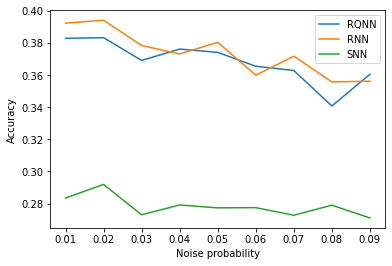

<Figure size 432x288 with 0 Axes>

In [ ]:
x = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
rqnn = [0.38277778, 0.38319445, 0.36902776, 0.37611112, 0.3740278, 0.36541668, 0.36277777, 0.34069446, 0.36041668]
dcnn = [0.39222223, 0.39402777, 0.37833333, 0.37305555, 0.38027778, 0.3598611, 0.37166667, 0.35569444, 0.3561111]
snn = [0.2834722, 0.29194444, 0.27305555, 0.27916667, 0.27736112, 0.2775, 0.27277777, 0.2790278, 0.2711111]

plt.ylabel("Accuracy")
plt.xlabel("Noise probability")
plt.plot(x,rqnn, label = "RQNN")

plt.plot(x,dcnn, label = "RNN")
plt.ylabel("Accuracy")
plt.xlabel("Noise probability")

plt.plot(x,snn, label = "SNN")
plt.ylabel("Accuracy")
plt.xlabel("Noise probability")
plt.legend()
plt.show()
plt.savefig("plot")

# End of file